In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/cleanedData.csv")

In [ ]:
df.head()

,date,T
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-02,1
4,2020-03-03,2


In [ ]:
df.shape

(794, 2)

In [ ]:
a=np.arange(0,794)
a.reshape(1,794)
b=np.ones_like(a)
b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
df['sun']=b

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    794 non-null    object
 1   T       794 non-null    int64 
 2   sun     794 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.7+ KB


In [ ]:
df["date"]=pd.to_datetime(df["date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    794 non-null    datetime64[ns]
 1   T       794 non-null    int64         
 2   sun     794 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 18.7 KB


In [ ]:
def rsun(x):
  if(x.dayofweek==6):
    return 0
  else:
    return 1


In [ ]:
df['Day of Week'] = df['date'].apply(lambda time: time.dayofweek)

In [ ]:
df.head()

,date,T,sun,Day of Week
0,2020-02-27,1,1,3
1,2020-02-28,14,1,4
2,2020-02-29,4,1,5
3,2020-03-02,1,1,0
4,2020-03-03,2,1,1


In [ ]:
df.drop(columns=["sun"],inplace=True)
df.head()

,date,T,Day of Week
0,2020-02-27,1,3
1,2020-02-28,14,4
2,2020-02-29,4,5
3,2020-03-02,1,0
4,2020-03-03,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         794 non-null    datetime64[ns]
 1   T            794 non-null    int64         
 2   Day of Week  794 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 18.7 KB


In [ ]:
df_r=df[(df['Day of Week']<5)]

In [ ]:
df_r.head()

,date,T,Day of Week
0,2020-02-27,1,3
1,2020-02-28,14,4
3,2020-03-02,1,0
4,2020-03-03,2,1
5,2020-03-04,1,2


In [ ]:
df_r.shape

(570, 3)

In [ ]:
df_r.to_csv("cleanedDatasun.csv",index=False)

In [ ]:
df_s=pd.read_csv("cleanedDatasun.csv")

In [ ]:
df_s.head()

,date,T,Day of Week
0,2020-02-27,1,3
1,2020-02-28,14,4
2,2020-03-02,1,0
3,2020-03-03,2,1
4,2020-03-04,1,2


In [ ]:
df_s.columns=["date","T",'D']

In [ ]:
df_s.drop(columns=["D"],inplace=True)

In [ ]:
df=df_s

In [ ]:
df=df.rename(columns={'date':'ds', 'T':'y'})
df.head()

,ds,y
0,2020-02-27,1
1,2020-02-28,14
2,2020-03-02,1
3,2020-03-03,2
4,2020-03-04,1


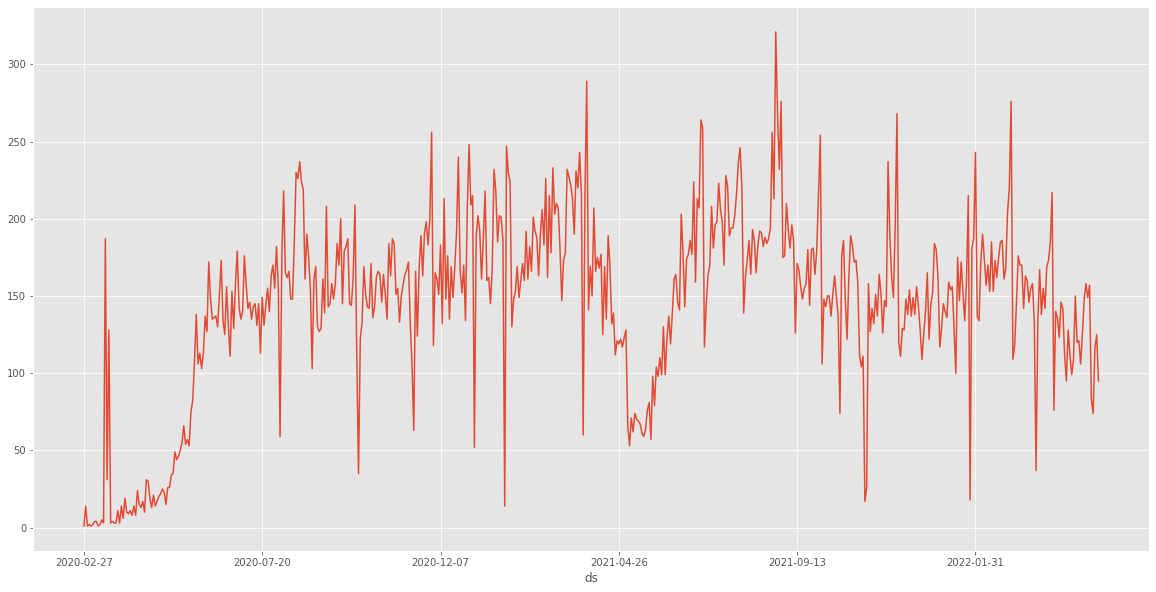

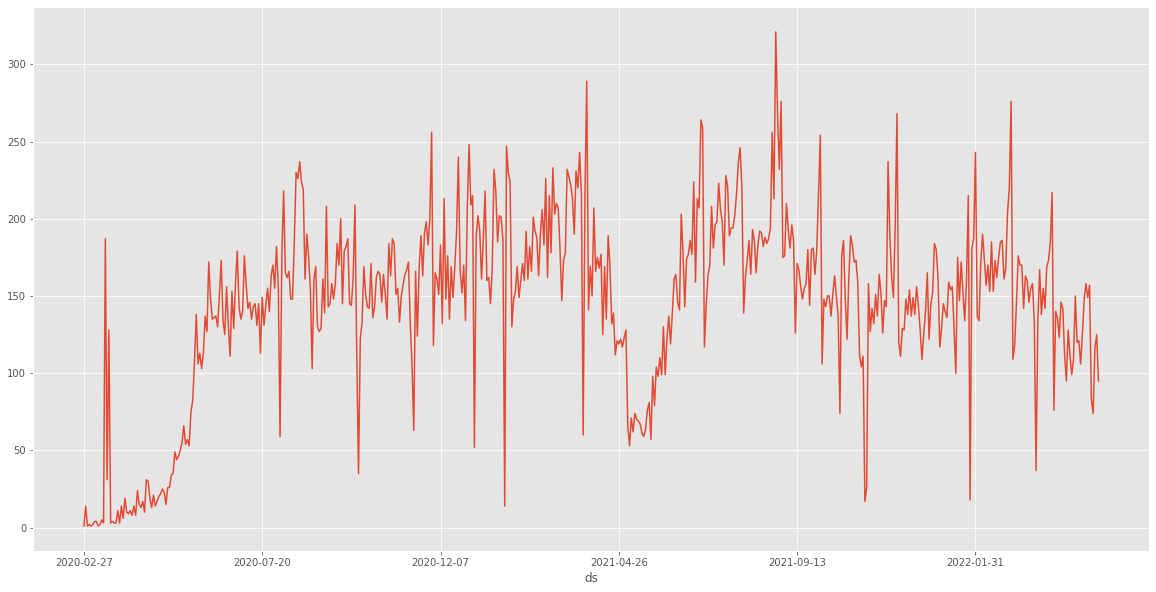

In [ ]:
plt.figure()
df.set_index('ds').y.plot().get_figure()

In [ ]:
train_df=df[(df["ds"]<'2021-12-15')&(df['ds']>'2020-05-10')]
test_df=df[df['ds']>='2021-12-15']
test_df.shape

(103, 2)

In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(train_df);

future = model.make_future_dataframe(periods=365, freq = 'd')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
forecast=model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-05-11,52.893101,69.145341,185.003847,52.893101,52.893101,73.140558,73.140558,73.140558,71.649432,71.649432,71.649432,1.491127,1.491127,1.491127,0.0,0.0,0.0,126.033660
1,2020-05-12,53.086142,76.289365,191.024144,53.086142,53.086142,81.207547,81.207547,81.207547,71.649432,71.649432,71.649432,9.558115,9.558115,9.558115,0.0,0.0,0.0,134.293688
2,2020-05-13,53.279182,78.438092,185.553227,53.279182,53.279182,79.325104,79.325104,79.325104,71.649432,71.649432,71.649432,7.675673,7.675673,7.675673,0.0,0.0,0.0,132.604286
3,2020-05-14,53.472222,67.998381,184.493597,53.472222,53.472222,73.698177,73.698177,73.698177,71.649432,71.649432,71.649432,2.048745,2.048745,2.048745,0.0,0.0,0.0,127.170399
4,2020-05-15,53.665263,65.112024,180.653145,53.665263,53.665263,68.788130,68.788130,68.788130,71.649432,71.649432,71.649432,-2.861301,-2.861301,-2.861301,0.0,0.0,0.0,122.453393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2022-12-10,80.603198,81.170605,202.017494,68.515214,91.843095,62.693253,62.693253,62.693253,71.649432,71.649432,71.649432,-8.956179,-8.956179,-8.956179,0.0,0.0,0.0,143.296451
778,2022-12-11,80.584848,83.411675,200.738139,68.470646,91.893302,62.693253,62.693253,62.693253,71.649432,71.649432,71.649432,-8.956179,-8.956179,-8.956179,0.0,0.0,0.0,143.278101
779,2022-12-12,80.566497,97.087035,210.177657,68.401197,91.942806,73.140558,73.140558,73.140558,71.649432,71.649432,71.649432,1.491127,1.491127,1.491127,0.0,0.0,0.0,153.707056
780,2022-12-13,80.548147,100.507452,223.794798,68.358083,91.962816,81.207547,81.207547,81.207547,71.649432,71.649432,71.649432,9.558115,9.558115,9.558115,0.0,0.0,0.0,161.755693


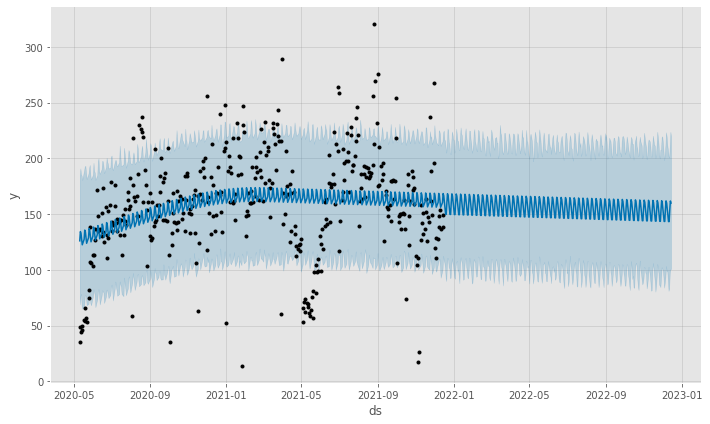

In [ ]:
plot1=model.plot(forecast)

In [ ]:
forecast_sub=forecast[["ds","yhat"]]
forecast_sub["ds"]=forecast_sub["ds"].astype(str)
test_df=test_df[['ds','y']]
metrics_df=test_df.merge(forecast_sub,on=['ds'],how='left')
metrics_df['abserror']=abs(metrics_df['y']-metrics_df['yhat'])
metrics_df['daily_df']=1-(metrics_df['abserror']/metrics_df['y'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
total_y=sum(metrics_df['y'])
total_error=sum(metrics_df['abserror'])
forecast_acc=1-(total_error/total_y)
print(forecast_acc)

0.8033927040179059


In [ ]:
metrics_df

,ds,y,yhat,abserror,daily_df
0,2021-12-15,156,166.534500,10.534500,0.932471
1,2021-12-16,144,160.889222,16.889222,0.882714
2,2021-12-17,128,155.960825,27.960825,0.781556
3,2021-12-20,109,160.258201,51.258201,0.529741
4,2021-12-21,125,168.306839,43.306839,0.653545
...,...,...,...,...,...
98,2022-05-02,83,157.817578,74.817578,0.098583
99,2022-05-03,74,165.866216,91.866216,-0.241435
100,2022-05-04,116,163.965423,47.965423,0.586505
101,2022-05-05,125,158.320145,33.320145,0.733439


In [ ]:
r2_score(metrics_df.y, metrics_df.yhat)

-0.3144244222729282

In [ ]:
mean_squared_error(metrics_df.y, metrics_df.yhat)

1574.6468348906078

In [ ]:
mean_absolute_error(metrics_df.y, metrics_df.yhat)

29.405060224871814